In [1]:
import os
import numpy as np
import pandas as pd
import laspy
import json
import geopandas as gpd

In [2]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

for parcel in os.listdir(parcelsFolder):

    parcelSubfolder = parcelsFolder + parcel + "/"
    for construction in [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]:
        print(parcel, construction)

4151302DF3845A 139
4151302DF3845A 305
4153906DF3845C 773
4153906DF3845C 771
4153906DF3845C 777
4151314DF3845A 613
4151314DF3845A 634
4151314DF3845A 672
4151314DF3845A 665
4151314DF3845A 609
4054901DF3845C 589
4054901DF3845C 401
4054901DF3845C 479
4054901DF3845C 244
4054901DF3845C 415
4054901DF3845C 345
4054901DF3845C 257
4054901DF3845C 408
4054901DF3845C 242
4054901DF3845C 335
4054901DF3845C 245
4054901DF3845C 333
4054901DF3845C 342
4054901DF3845C 487
4054901DF3845C 490
4054901DF3845C 537
4054901DF3845C 171
4554901DF3845D 334
4157903DF3845E 86
4157903DF3845E 85
4349307DF3844G 728
4349307DF3844G 729
4349307DF3844G 727
4349307DF3844G 730
4853801DF3845D 619
4853801DF3845D 584
4853801DF3845D 701
4649601DF3844H 574
4649601DF3844H 558
4649601DF3844H 550
4649601DF3844H 573
4649601DF3844H 572
4649601DF3844H 577
4649601DF3844H 557
4649601DF3844H 548
4649601DF3844H 559
4649601DF3844H 546
4649601DF3844H 575
4649601DF3844H 576


In [4]:
lidarCellsInfoFile = basePath + "Results/Test_70_el Besòs i el Maresme/necessaryLiDAR_Buffer100.txt"
lidarInfoDF = pd.read_csv(lidarCellsInfoFile)
lidarInfoDF["files"] = lidarInfoDF["files"].apply(json.loads)
lidarInfoDF["bounds"] = lidarInfoDF["bounds"].apply(json.loads)
lidarInfoDF

REFCAT                             files  \
0    4258401DF3845G                          [434585]   
1    4258901DF3845G                          [434585]   
2    4449702DF3844G                          [434584]   
3    4357802DF3845E                          [434585]   
4    4554901DF3845D                          [434585]   
..              ...                               ...   
366  4252910DF3845C  [434584, 433585, 433584, 434585]   
367  4151309DF3845A  [434584, 433585, 433584, 434585]   
368  4151314DF3845A  [434584, 433585, 433584, 434585]   
369  4151307DF3845A  [434584, 433585, 433584, 434585]   
370  4153906DF3845C  [434584, 433585, 433584, 434585]   

                                                bounds  file_count  
0     [434010.3995, 4585550.47, 434275.11, 4585815.04]           1  
1    [434044.3095, 4585532.04, 434263.8095, 4585751...           1  
2    [434180.9825, 4584599.2175, 434442.333, 458485...           1  
3    [434130.961, 4585392.928, 434389.2845, 4585651...           1  
4    [434342.947, 4585112.817, 434596.217, 4585365....           1  
..                                                 ...         ...  
366  [433996.898, 4584900.6125, 434246.5775, 458514...           4  
367  [433891.084, 4584857.6295, 434186.0345, 458513...           4  
368  [433877.594, 4584790.1295, 434191.754, 4585083...           4  
369  [433956.834, 4584845.5895, 434202.2545, 458508...           4  
370  [433873.7455, 4584979.0, 434215.0255, 4585319.46]           4  

[371 rows x 4 columns]

In [5]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

for parcel in os.listdir(parcelsFolder):
    parcelSubfolder = parcelsFolder + parcel + "/"
    print(parcel, lidarInfoDF[lidarInfoDF.REFCAT == parcel].files.values)

4151302DF3845A [list(['434584', '433585', '433584', '434585'])]
4153906DF3845C [list(['434584', '433585', '433584', '434585'])]
4151314DF3845A [list(['434584', '433585', '433584', '434585'])]
4054901DF3845C [list(['433585', '434585'])]
4554901DF3845D [list(['434585'])]
4157903DF3845E [list(['433585', '434585'])]
4349307DF3844G [list(['434584'])]
4853801DF3845D [list(['434585'])]
4649601DF3844H [list(['434584'])]


In [142]:
lidarFolder = basePath + "RAW_Data/LiDAR/"
parcel = "4054901DF3845C"
parcelSubfolder = parcelsFolder + parcel + "/"
construction = 408
construction = str(construction)
lazFiles = lidarInfoDF[lidarInfoDF.REFCAT == parcel].files.values[0]
bounds = lidarInfoDF[lidarInfoDF.REFCAT == parcel].bounds.values[0]

lasDF_list = []
for file in lazFiles:
    lasPath = lidarFolder + file + ".laz"
    lasDF = laspy.read(lasPath)
    print(len(lasDF.xyz))
    lasDF_list.append(lasDF.xyz)

# Concatenate all DataFrames in the list to create a single DataFrame
lasCoords = np.concatenate(lasDF_list)
print(len(lasCoords))


24587063
23925055
48512118


In [143]:
selectedCoords = lasCoords[np.where((lasCoords[:,0] > bounds[0]) & (lasCoords[:,1] > bounds[1]) & (lasCoords[:,0] < bounds[2]) & (lasCoords[:,1] < bounds[3]))]
len(selectedCoords)

3103819

<Axes: >

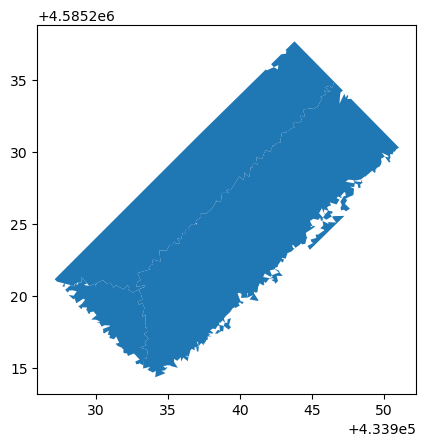

In [144]:
constructionFolder = parcelSubfolder + construction
constructionFile = constructionFolder + "/Plane Identification/"+ construction+".gpkg"
planesGDF = gpd.read_file(constructionFile)
planesGDF.geometry.area
planesGDF.plot()

In [145]:
lasConstruction = laspy.read(constructionFolder + "/Plane Identification/"+ construction+".laz")
np.unique(planesGDF.cluster)

array([1, 2, 3, 4], dtype=int16)

# Now we start with creating the DEM

In [146]:
import pygmt
spacing = 0.35
region = pygmt.info(data=selectedCoords, spacing=spacing)
df_trimmed = pygmt.blockmedian(data=selectedCoords, T=0.99, spacing = spacing, region = region)
df_trimmed = df_trimmed.rename(columns={0:"x",1:"y",2:"z"})
df_trimmed

x            y       z
0       433784.534  4585415.040   3.114
1       433784.776  4585415.110   3.110
2       433785.195  4585414.928   3.203
3       433785.619  4585415.015   3.260
4       433785.750  4585415.048   3.869
...            ...          ...     ...
914831  434119.644  4585074.275  27.750
914832  434120.056  4585074.237  27.729
914833  434120.427  4585074.192  27.732
914834  434120.778  4585074.287  27.717
914835  434121.159  4585074.162  27.731

[914836 rows x 3 columns]

In [147]:
grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography
grid.where(grid.x == 433948)

/tmp/ipykernel_249738/2551975598.py:1: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography
surface [WARNING]: 1232 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


<xarray.DataArray 'z' (y: 977, x: 965)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 4.585e+06 4.585e+06 4.585e+06 ... 4.585e+06 4.585e+06
  * x        (x) float64 4.338e+05 4.338e+05 4.338e+05 ... 4.341e+05 4.341e+05
Attributes:
    Conventions:   CF-1.7
    title:         Data gridded with continuous surface splines in tension
    history:       gmt surface @GMTAPI@-S-I-D-V-T-N-000000 -G@GMTAPI@-S-O-G-G...
    description:   
    long_name:     z
    actual_range:  [nan nan]

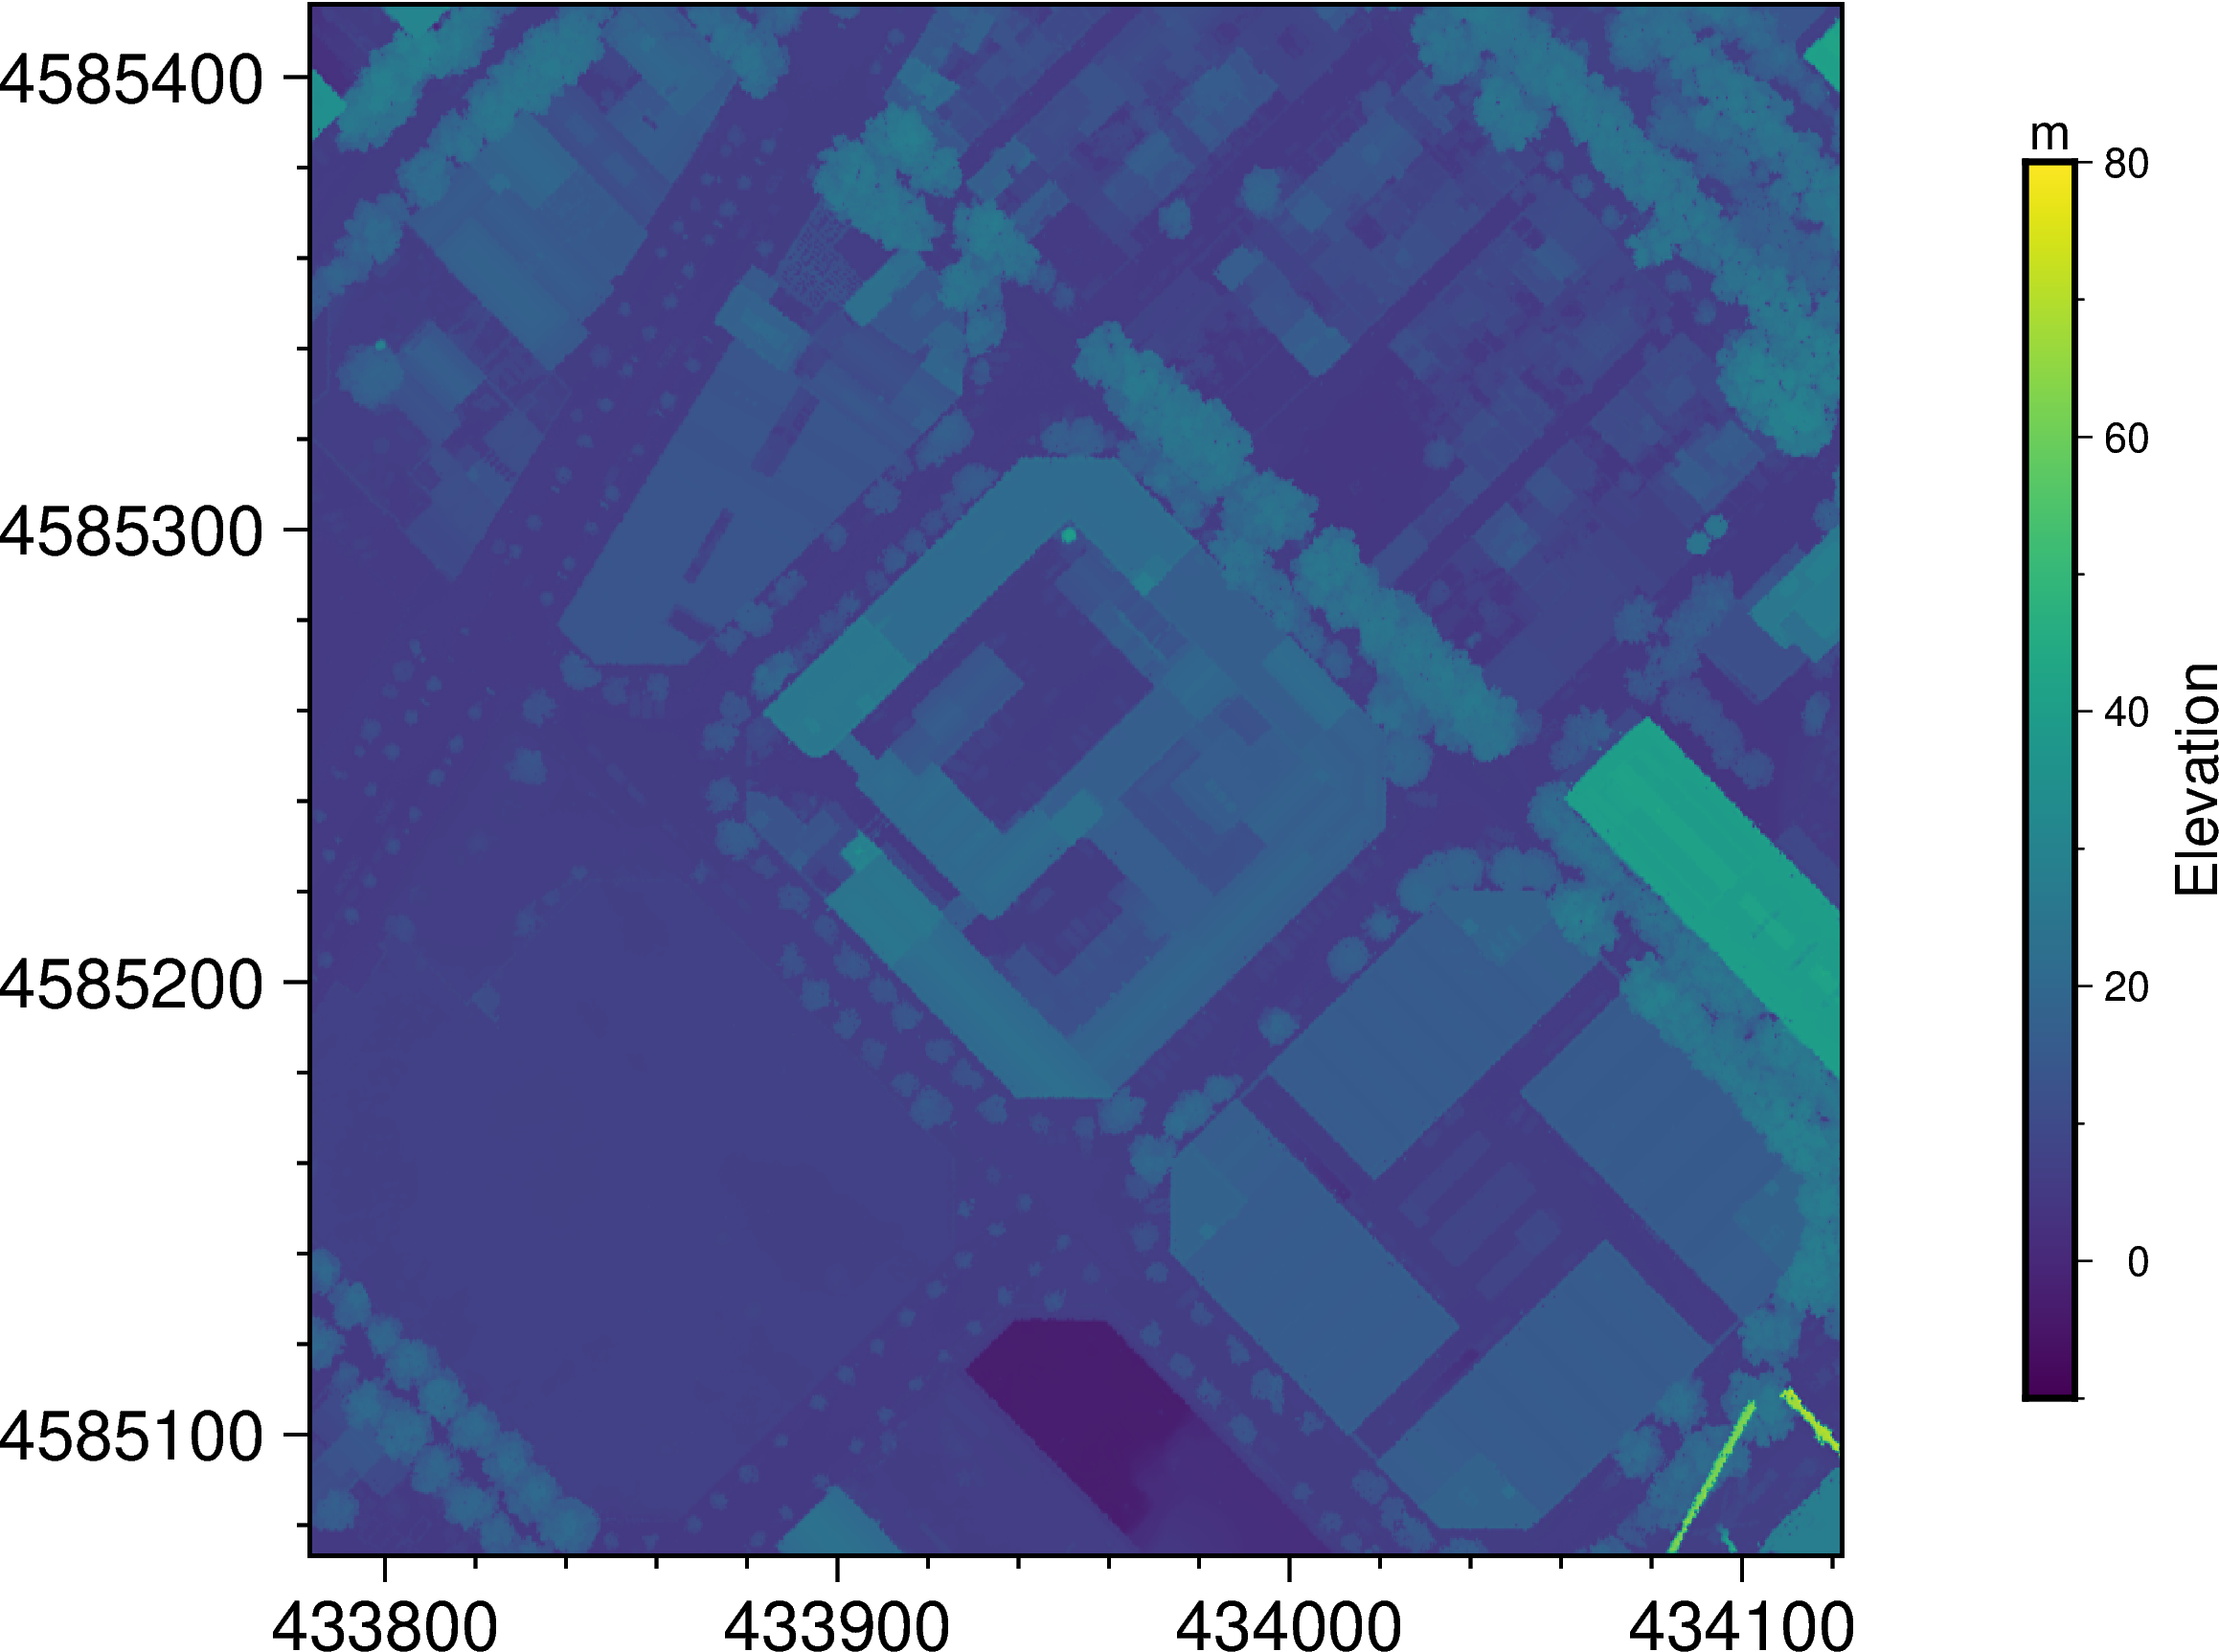

In [98]:
fig2 = pygmt.Figure()
fig2.basemap(
    frame=True,
    region=region,
    projection="x1:5000",
)
pygmt.makecpt(cmap="viridis", series=[-10, 80])
fig2.grdimage(grid=grid, cmap=True)
fig2.colorbar(position="JMR", frame=["af+lElevation", "y+lm"])
fig2.show(dpi=600)

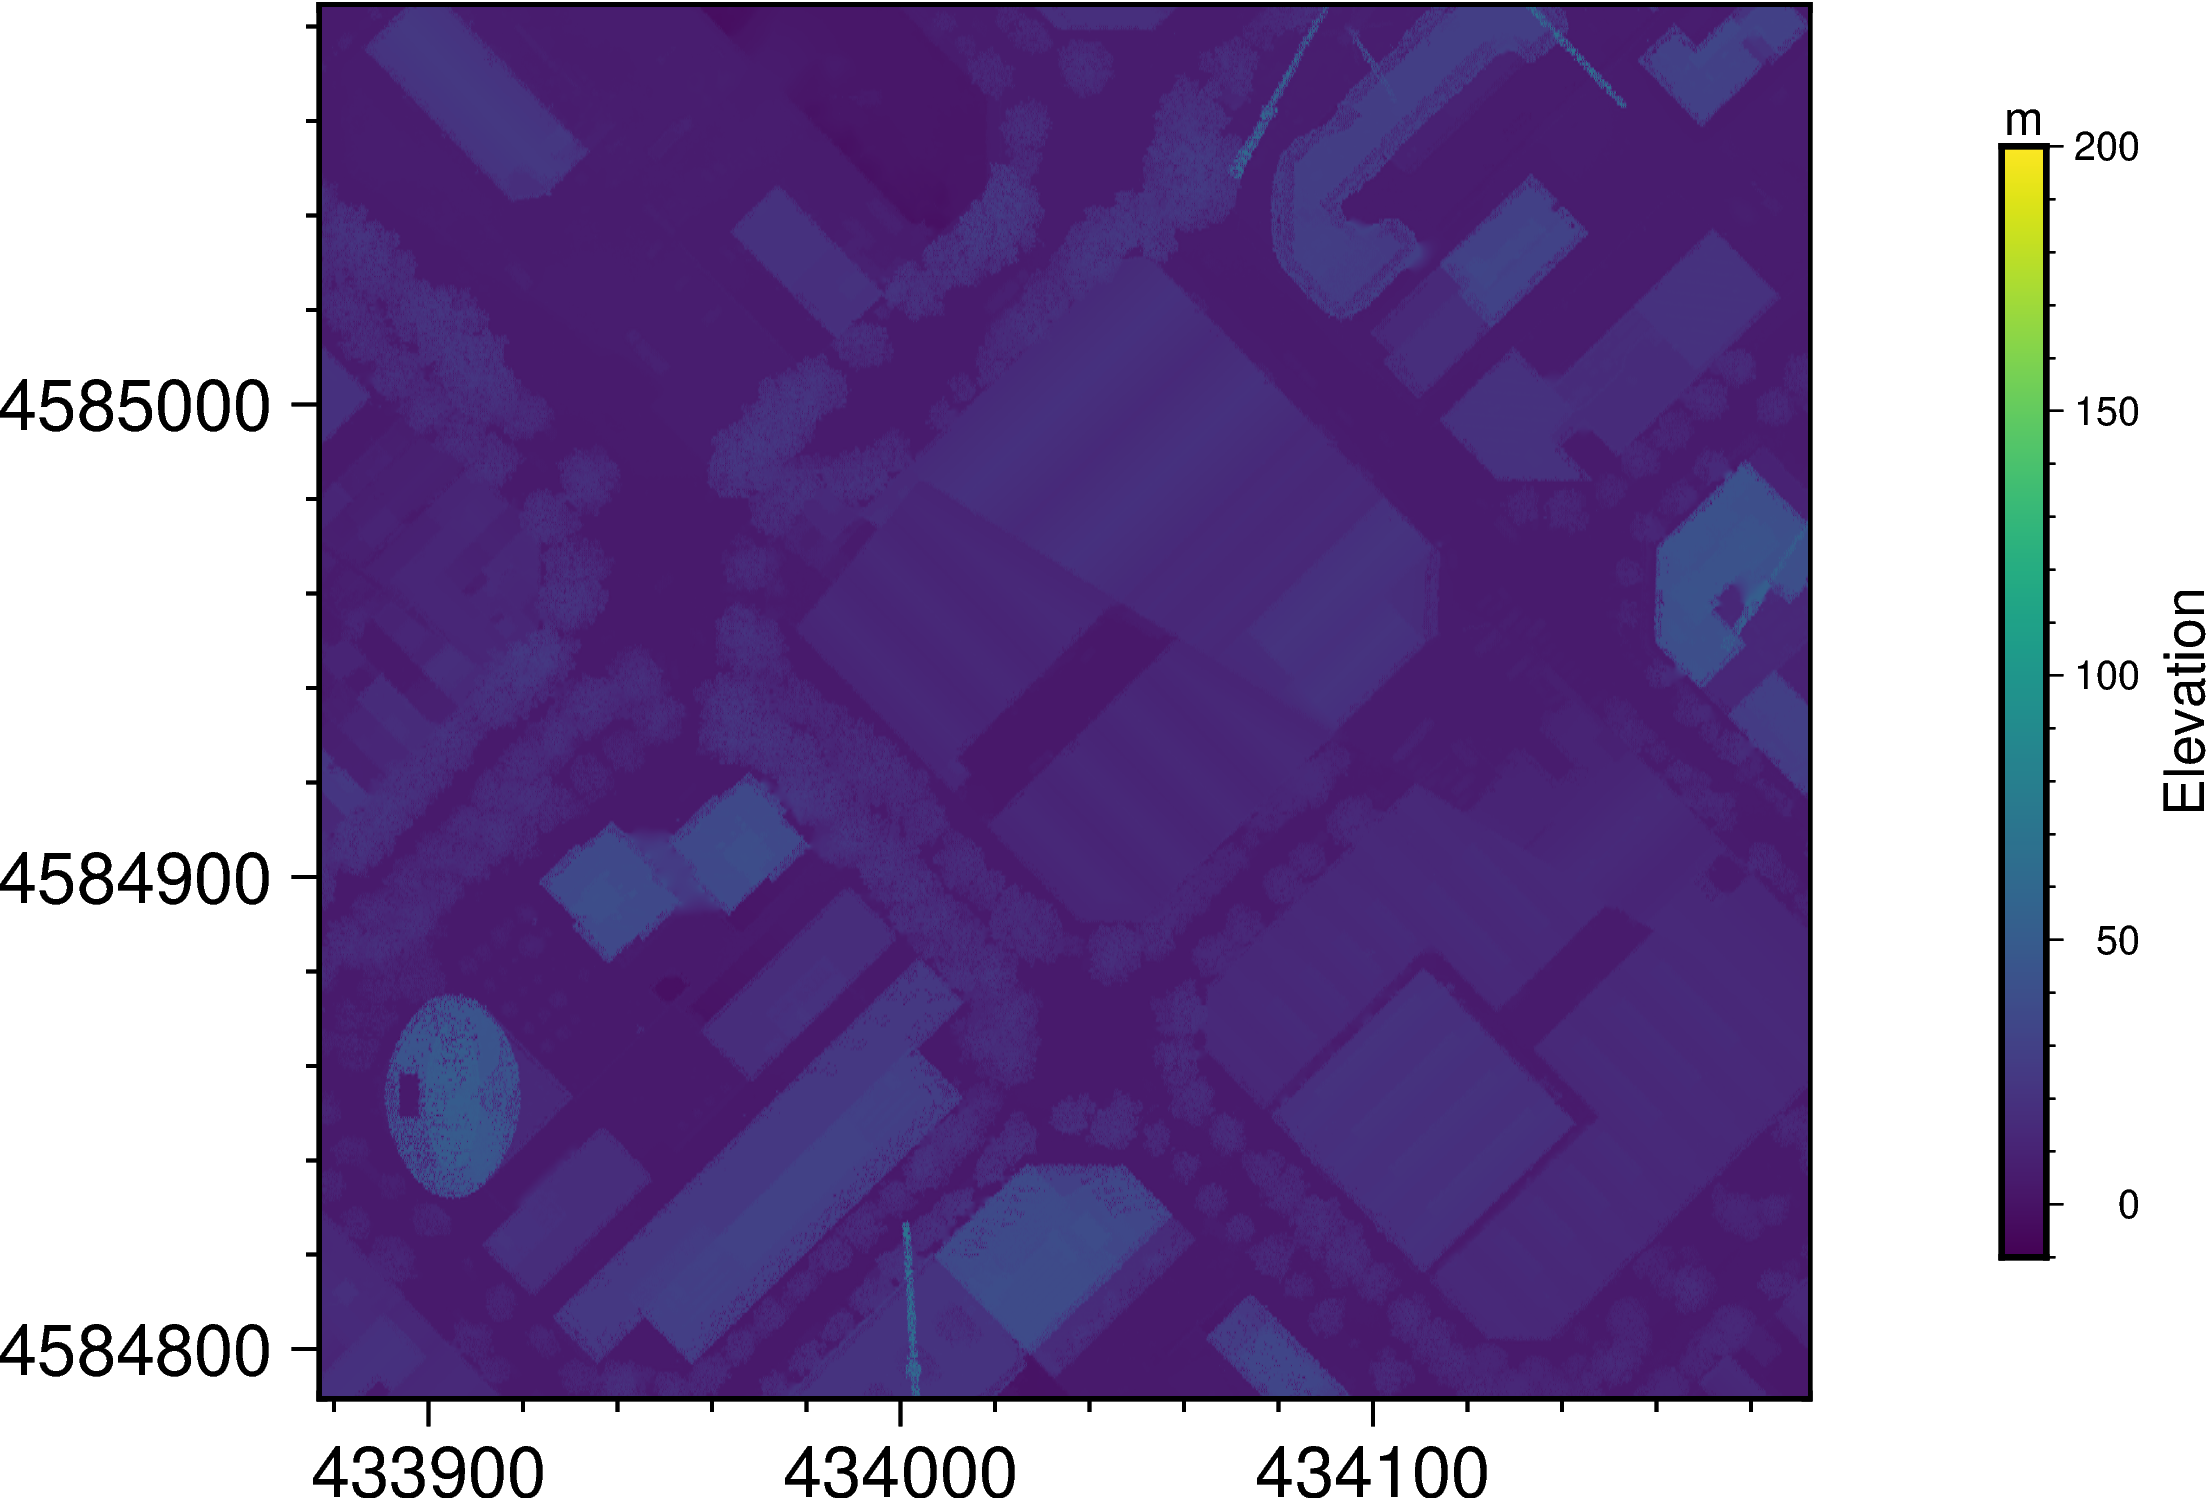

In [16]:
fig2.show(dpi=600)

In [83]:
fig3 = pygmt.Figure()
fig3.grdview(
    grid=grid,
    cmap="bukavu",
    surftype="s",  # surface plot
    perspective=[135, 30],  # azimuth bearing, and elevation angle
    zscale=0.02,  # vertical exaggeration
    shading=True,  # hillshading
    frame=[
        "xaf+lEasting",
        "yaf+lNorthing",
        "zaf+lElevation (m)",
        "+tExemple model",
    ],
)
fig3.show()

# Now let's process it

In [148]:
clusterID = 1

planesGDF[planesGDF.cluster==clusterID].plot()

<Axes: >

In [149]:
planesGDF[planesGDF.cluster==clusterID].centroid

# Extract x, y coordinates and z values
x = grid.x.values  # Extract x-coordinates
y = grid.y.values  # Extract y-coordinates
z = grid.values    # Extract grid values (z)

# Create a numpy meshgrid
X, Y = np.meshgrid(x, y)
z.shape



(977, 965)

In [150]:
planesGDF[planesGDF.cluster==clusterID]

cluster         A         B             D  tilt     azimuth  silhouette  \
2        1 -0.237036  0.244355 -1.017541e+06  18.8  135.871064    0.850265   

                                            geometry  
2  POLYGON ((433933.943 4585214.663, 433933.943 4...

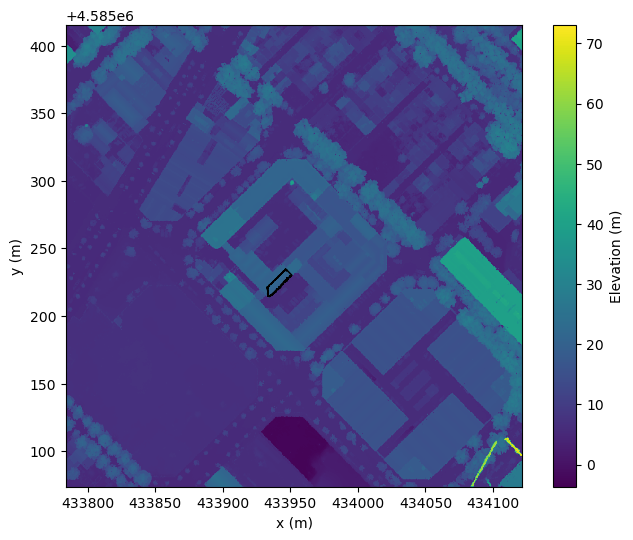

In [151]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto')

planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

fig.colorbar(c, ax=ax, label="Elevation (m)")
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/DSM.png",bbox_inches='tight')
plt.show()

In [152]:
from collections import defaultdict
from shapely import Point
def sample_points(clusterPoints, cellSize = 0.5):
    grid = defaultdict(list)

    # Round points to the nearest integer for x and y
    for point in clusterPoints:
        x, y, z = point
        grid_cell = (round(x/cellSize)*cellSize, round(y/cellSize)*cellSize)
        grid[grid_cell].append(z)

    # Prepare the output as a reduced array with the average z-value for each grid cell
    reduced_array = []
    for grid_cell, z_values in grid.items():
        x, y = grid_cell
        avg_z = np.mean(z_values)  # Compute the average z-value for the grid cell
        reduced_array.append([x, y, avg_z])
    return reduced_array

clusterPoints = lasConstruction[lasConstruction.classification == clusterID]
clusterPoints = clusterPoints.xyz
shapely_points = [Point(p[:2]) for p in clusterPoints]
geometry = planesGDF[planesGDF.cluster == clusterID].geometry.values
inside_points = [point for point, shapely_point in zip(clusterPoints, shapely_points) if geometry.contains(shapely_point)]

sampled = sample_points(inside_points, cellSize=1)
sampled = np.array(sampled)

In [153]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto')
fig.colorbar(c, ax=ax, label="Elevation (m)")


# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')


point = [planesGDF[planesGDF.cluster==clusterID].centroid.x.values[0], planesGDF[planesGDF.cluster==clusterID].centroid.y.values[0]]
ax.scatter(sampled[:, 0], sampled[:, 1], s=1, c="red")
# Show the plot
minSize=20
ax.set_xlim(point[0]-minSize, point[0]+minSize)
ax.set_ylim(point[1]-minSize, point[1]+minSize)
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/Sampling.png",bbox_inches='tight')
plt.show()

In [154]:
plane = planesGDF[planesGDF.cluster==clusterID]
point = [433948, 4585232]
Z_point = point[0]*plane.A + point[1]*plane.B + plane.D
Z_point = Z_point.values[0] + 0.05
Z_point

20.934905092418195

In [155]:
import math
tiltangle = np.zeros(X.shape)
distance = (X[:,:] - point[0])**2 + (Y[:,:] - point[1])**2
tiltangle = np.arctan2((z[:,:] - Z_point), distance[:,:])*180/math.pi
tiltangle = np.maximum(tiltangle, 0)
azimuthAngle = np.zeros(X.shape)
azimuthAngle = np.arctan2(X[:,:] - point[0], Y[:,:] - point[1])*180/math.pi
azimuthAngle = np.where(azimuthAngle < 0, azimuthAngle + 360, azimuthAngle)
azimuthAngle = np.round(azimuthAngle).astype(int)

In [156]:
tiltangle.max()

38.28301185628004

/tmp/ipykernel_249738/3430635935.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


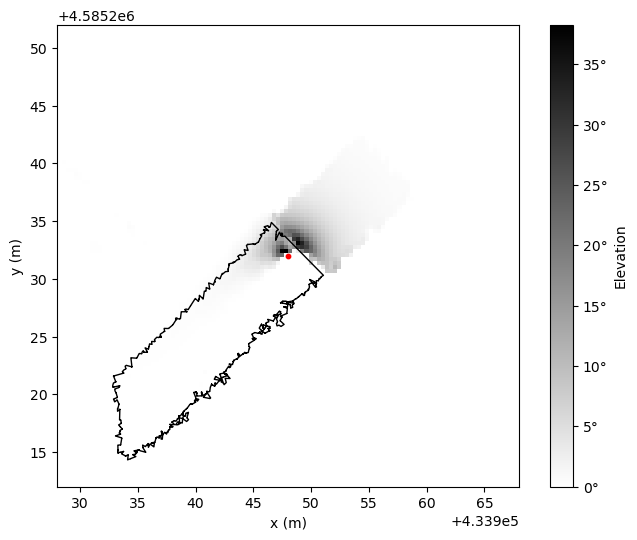

In [157]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, tiltangle, cmap='gray_r', shading='auto')
#c = ax.pcolormesh(X, Y, np.log(tiltangle), cmap='gray_r', shading='auto')
cb = fig.colorbar(c, ax=ax, label="Elevation")

# Customize colorbar ticks
cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick



# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

minSize=20
ax.set_xlim(point[0]-minSize, point[0]+minSize)
ax.set_ylim(point[1]-minSize, point[1]+minSize)

ax.scatter(point[0], point[1], s=10, c="red")

zoom_factory(ax)
panhandler(fig)

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/ShadingPoint.png",bbox_inches='tight')
plt.show()

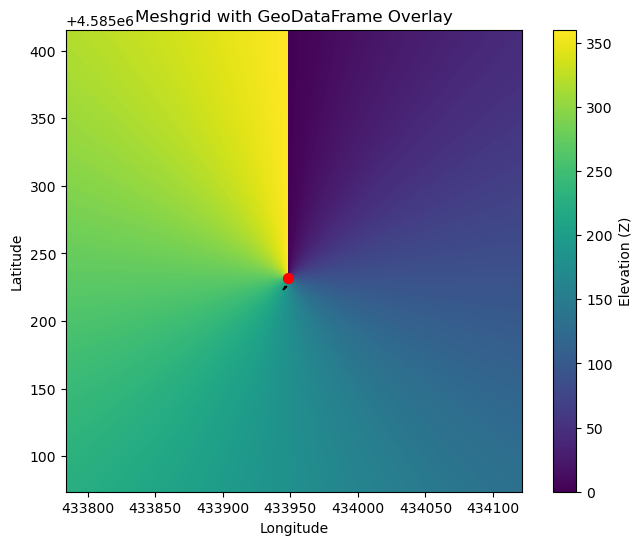

In [158]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, azimuthAngle, cmap='viridis', shading='auto')
fig.colorbar(c, ax=ax, label="Elevation (Z)")


# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Meshgrid with GeoDataFrame Overlay')

ax.scatter(point[0], point[1], s=50, c="red")
# Show the plot
plt.show()

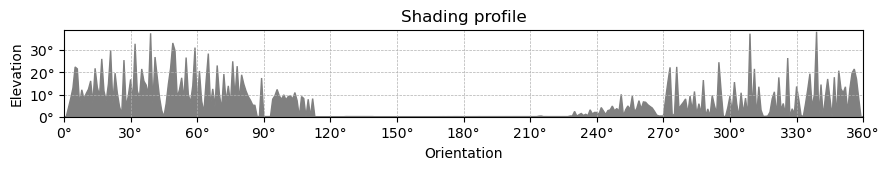

In [159]:
azimuthAngle_flat = azimuthAngle.ravel()
tiltangle_flat = tiltangle.ravel()
df = pd.DataFrame({
    'azimuth': azimuthAngle_flat,
    'tiltangle': tiltangle_flat
})

# Group by azimuth and get the maximum tiltangle for each azimuth
max_tilt_df = df.groupby('azimuth')['tiltangle'].max().reset_index()

# plt.plot(azimuthAngle_flat, tiltangle_flat)
plt.figure(figsize=(9, 2)) 
plt.fill(max_tilt_df.azimuth, max_tilt_df.tiltangle, c="gray")
plt.title('Shading profile')
plt.xlabel('Orientation')
plt.ylabel('Elevation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0, 360)
plt.ylim(0, max(max_tilt_df.tiltangle) + 1)
xticks = range(0, 361, 30)  # Tick every 30°
yticks = range(0, int(max(max_tilt_df.tiltangle)) + 1, 10)  # Tick every 5°
plt.xticks(xticks, [f"{tick}°" for tick in xticks])
plt.yticks(yticks, [f"{tick}°" for tick in yticks])
plt.tight_layout()
plt.gca().set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/ShadingProfilePoint.pdf", dpi=300,bbox_inches='tight')
plt.show()

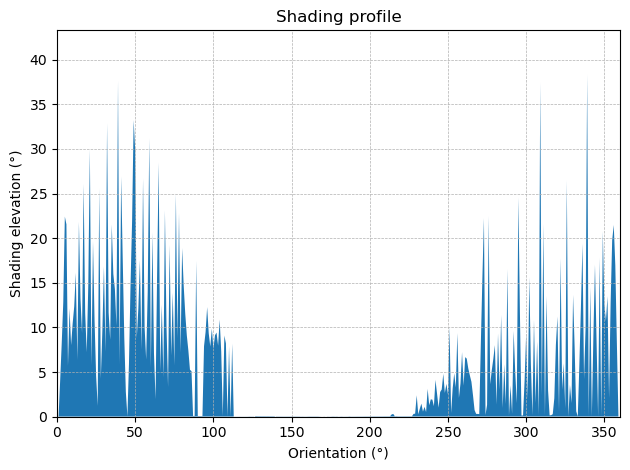

In [26]:
plt.fill(max_tilt_df.azimuth, max_tilt_df.tiltangle)
plt.title('Shading profile')
plt.xlabel('Orientation (°)')
plt.ylabel('Shading elevation (°)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0, 360)
plt.ylim(0, max(max_tilt_df.tiltangle) + 5)
plt.tight_layout()
plt.show()

# Getting a shading map

In [164]:
shadingPath = basePath + "Results/Test_70_el Besòs i el Maresme/Parcels/4054901DF3845C/408/Shading/"
shadingFiles = ["1.csv", "2.csv", "3.csv"]

shadingProfiles = pd.DataFrame()

for shadingFile in shadingFiles:
    filePath = os.path.join(shadingPath, shadingFile)
    temp_df = pd.read_csv(filePath, header=None)  # Read the CSV file
    shadingProfiles = pd.concat([shadingProfiles, temp_df], ignore_index=True)  # Concatenate into the main dataframe

shadingProfiles['avg'] = shadingProfiles.iloc[:, 3:363].mean(axis=1)
shadingProfiles = shadingProfiles.rename(columns={0:"x", 1:"y"})
shadingProfiles

x          y      2     3    4    5     6     7     8     9  ...  \
0    433946.0  4585233.0  21.68  90.0  0.0  0.0   0.0   0.0   0.0   0.0  ...   
1    433946.0  4585234.0  21.64   0.0  0.0  0.0   0.0   0.0   0.0   0.0  ...   
2    433947.0  4585234.0  21.75  90.0  0.0  0.0   0.0  16.0  12.0   0.0  ...   
3    433944.0  4585232.0  21.62   0.0  0.0  0.0   0.0   0.0   0.0   0.0  ...   
4    433945.0  4585232.0  21.66  90.0  0.0  0.0   0.0   0.0   0.0   0.0  ...   
..        ...        ...    ...   ...  ...  ...   ...   ...   ...   ...  ...   
234  433933.0  4585219.0  20.73  40.0  1.0  7.0  11.0  13.0  15.0  17.0  ...   
235  433933.0  4585218.0  20.46  90.0  3.0  7.0   9.0  12.0  15.0  18.0  ...   
236  433932.0  4585217.0  19.99  12.0  4.0  5.0   7.0   9.0  11.0  12.0  ...   
237  433933.0  4585217.0  20.20  28.0  4.0  7.0   9.0  12.0  15.0  18.0  ...   
238  433933.0  4585216.0  20.00  16.0  4.0  6.0   8.0   9.0  10.0  11.0  ...   

      355   356   357   358   359   360  361  362  363        avg  
0     0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   2.263889  
1     0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   3.966667  
2     4.0   0.0   0.0   5.0  16.0   0.0  0.0  0.0  0.0  12.091667  
3     0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   1.213889  
4     0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   1.588889  
..    ...   ...   ...   ...   ...   ...  ...  ...  ...        ...  
234  17.0  15.0  14.0  12.0  12.0  10.0  6.0  1.0  0.0   8.250000  
235  15.0  13.0  11.0  10.0  10.0   8.0  7.0  3.0  0.0   8.200000  
236   8.0   9.0  10.0   9.0   8.0   6.0  5.0  3.0  0.0   7.086111  
237  14.0  13.0  13.0  11.0   9.0   8.0  6.0  4.0  0.0   7.938889  
238   9.0   9.0   9.0   8.0   7.0   6.0  5.0  3.0  0.0   9.827778  

[239 rows x 365 columns]

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = shadingProfiles["x"]
y = shadingProfiles["y"]
z = shadingProfiles["avg"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gray_r')
cb = fig.colorbar(heatmap, ax=ax, label="Average shading angle")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

centroid = planesGDF[planesGDF.cluster==clusterID].centroid.values[0]
centroid = [centroid.x, centroid.y]
minSize=20
ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/ShadingWholeRoof.png",bbox_inches='tight')
plt.show()

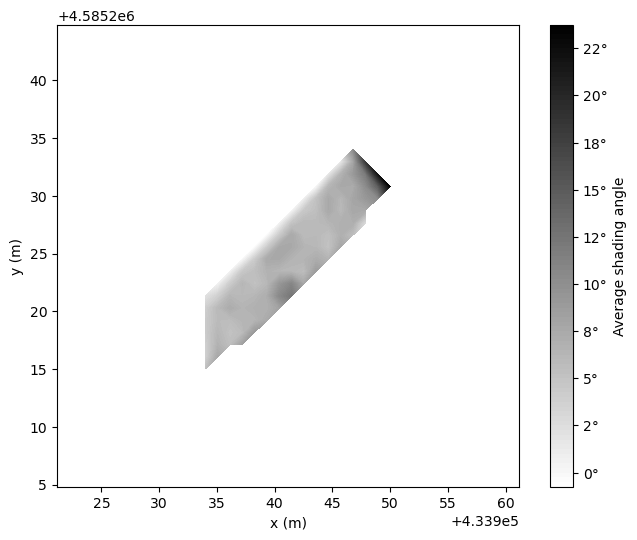

In [114]:
shadingFiles = ["1.csv"]
shadingPath = basePath + "Results/Test_70_el Besòs i el Maresme/Parcels/4054901DF3845C/408/Shading/"

shadingProfiles = pd.DataFrame()

for shadingFile in shadingFiles:
    filePath = os.path.join(shadingPath, shadingFile)
    temp_df = pd.read_csv(filePath, header=None)  # Read the CSV file
    shadingProfiles = pd.concat([shadingProfiles, temp_df], ignore_index=True)  # Concatenate into the main dataframe

shadingProfiles['avg'] = shadingProfiles.iloc[:, 3:363].mean(axis=1)
shadingProfiles = shadingProfiles.rename(columns={0:"x", 1:"y"})

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = shadingProfiles["x"]
y = shadingProfiles["y"]
z = shadingProfiles["avg"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gray_r')
cb = fig.colorbar(heatmap, ax=ax, label="Average shading angle")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

centroid = planesGDF[planesGDF.cluster==clusterID].centroid.values[0]
centroid = [centroid.x, centroid.y]
minSize=20
ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.show(transparent=True)

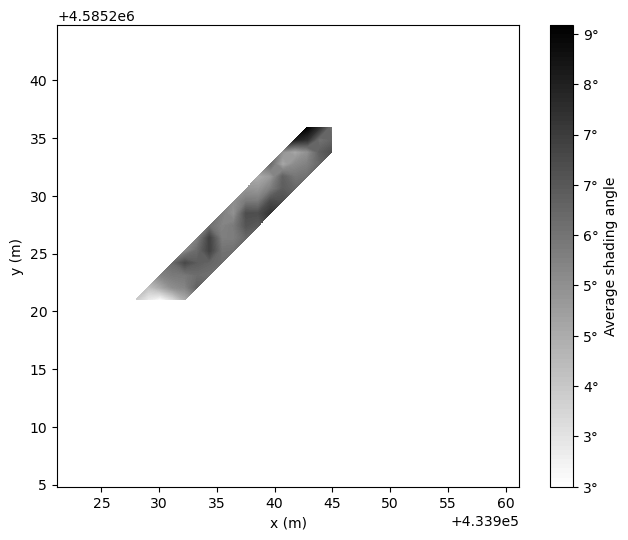

In [111]:
shadingFiles = ["2.csv"]
shadingPath = basePath + "Results/Test_70_el Besòs i el Maresme/Parcels/4054901DF3845C/408/Shading/"

shadingProfiles = pd.DataFrame()

for shadingFile in shadingFiles:
    filePath = os.path.join(shadingPath, shadingFile)
    temp_df = pd.read_csv(filePath, header=None)  # Read the CSV file
    shadingProfiles = pd.concat([shadingProfiles, temp_df], ignore_index=True)  # Concatenate into the main dataframe

shadingProfiles['avg'] = shadingProfiles.iloc[:, 3:363].mean(axis=1)
shadingProfiles = shadingProfiles.rename(columns={0:"x", 1:"y"})

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = shadingProfiles["x"]
y = shadingProfiles["y"]
z = shadingProfiles["avg"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gray_r')
cb = fig.colorbar(heatmap, ax=ax, label="Average shading angle")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

centroid = planesGDF[planesGDF.cluster==clusterID].centroid.values[0]
centroid = [centroid.x, centroid.y]
minSize=20
ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.show()

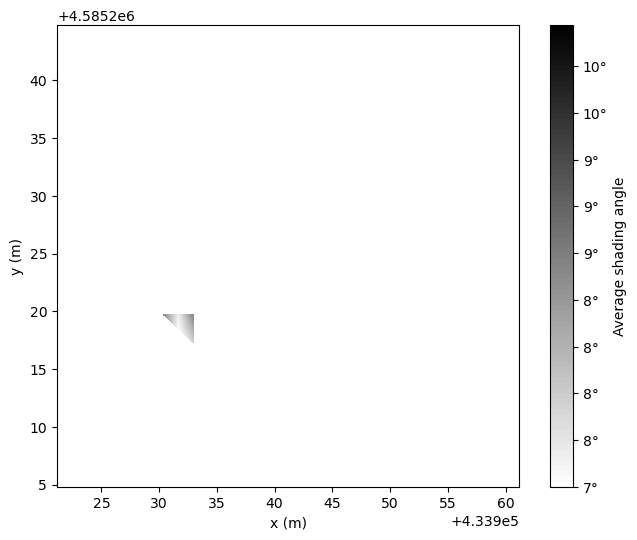

In [112]:
shadingFiles = ["3.csv"]
shadingPath = basePath + "Results/Test_70_el Besòs i el Maresme/Parcels/4054901DF3845C/408/Shading/"

shadingProfiles = pd.DataFrame()

for shadingFile in shadingFiles:
    filePath = os.path.join(shadingPath, shadingFile)
    temp_df = pd.read_csv(filePath, header=None)  # Read the CSV file
    shadingProfiles = pd.concat([shadingProfiles, temp_df], ignore_index=True)  # Concatenate into the main dataframe

shadingProfiles['avg'] = shadingProfiles.iloc[:, 3:363].mean(axis=1)
shadingProfiles = shadingProfiles.rename(columns={0:"x", 1:"y"})

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = shadingProfiles["x"]
y = shadingProfiles["y"]
z = shadingProfiles["avg"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gray_r')
cb = fig.colorbar(heatmap, ax=ax, label="Average shading angle")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

centroid = planesGDF[planesGDF.cluster==clusterID].centroid.values[0]
centroid = [centroid.x, centroid.y]
minSize=20
ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.show()

In [53]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, tiltangle, cmap='gray_r', shading='auto')
#c = ax.pcolormesh(X, Y, np.log(tiltangle), cmap='gray_r', shading='auto')
cb = fig.colorbar(c, ax=ax, label="Elevation")

# Customize colorbar ticks
cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick

centroid = planesGDF[planesGDF.cluster==clusterID].centroid.values[0]
centroid = [centroid.x, centroid.y]


# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

minSize=20
ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Shading/ShadingWholeRoof.png",bbox_inches='tight')
plt.show()

/tmp/ipykernel_249738/730122741.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# Some previous tests

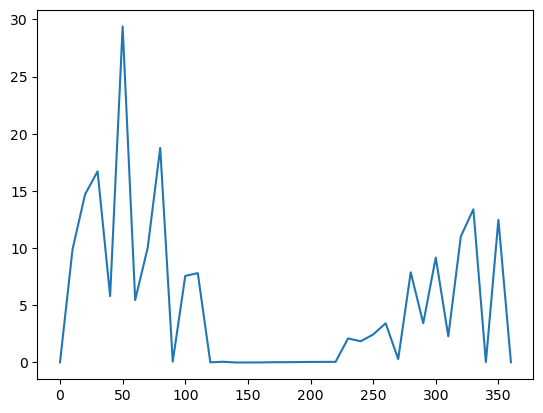

In [172]:
from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 18+1) 
spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=2)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)
plt.show()

xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 36+1) 
spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=2)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)
plt.show()

xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 72+1) 
spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)
plt.show()

xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 120+1) 
spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)
plt.show()

# xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 180) 
# spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=3)  # type: BSpline
# power_smooth = spl(xnew)
# plt.plot(xnew, power_smooth)

# xnew = np.linspace(max_tilt_df.azimuth.min(), max_tilt_df.azimuth.max(), 360) 
# spl = make_interp_spline(max_tilt_df.azimuth, max_tilt_df.tiltangle, k=3)  # type: BSpline
# power_smooth = spl(xnew)
# plt.plot(xnew, power_smooth)

# Max jumping

In [173]:
plt.plot(max_tilt_df.azimuth, max_tilt_df.tiltangle)
plt.show()

In [174]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

def getLocalMaxima(data):
    local_maxima_indices = []
    for i in range(len(data)):
        prev_idx = (i - 1) % len(data)
        next_idx = (i + 1) % len(data)
        if data[i] > data[prev_idx] and data[i] > data[next_idx]:
            local_maxima_indices.append(i)

    local_maxima_indices = np.array(local_maxima_indices)
    local_maxima_values = data[local_maxima_indices]

    # Include all indices for a complete interpolation
    full_indices = np.arange(len(data) + 1)
    full_maxima_indices = np.concatenate((local_maxima_indices, [local_maxima_indices[0] + len(data)]))
    full_maxima_values = np.concatenate((local_maxima_values, [local_maxima_values[0]]))

    # Interpolate between local maxima
    interpolator = interp1d(full_maxima_indices, full_maxima_values, kind='linear', fill_value='extrapolate')
    # interpolator = CubicSpline(full_maxima_indices, full_maxima_values, bc_type='periodic')
    interpolated_values = interpolator(np.arange(len(data)))

    return interpolated_values

interpolated_values = getLocalMaxima(max_tilt_df.tiltangle.values)
interpolated_values2 = getLocalMaxima(interpolated_values)
interpolated_values3 = getLocalMaxima(interpolated_values2)

plt.scatter(max_tilt_df.azimuth, max_tilt_df.tiltangle, label='Original Data', marker='o')
plt.plot(max_tilt_df.azimuth, interpolated_values, label='Interpolated Between Maxima', linestyle="--")
plt.plot(max_tilt_df.azimuth, interpolated_values2, label='Interpolated Between Maxima Twice')
plt.plot(max_tilt_df.azimuth, interpolated_values3, label='Interpolated Between Maxima Thrice')
plt.legend()
plt.show()

In [114]:
interpolated_values2

array([35.72205212, 35.57483973, 35.42762735, 35.28041496, 35.13320258,
       34.9859902 , 34.83877781, 34.69156543, 34.54435305, 34.39714066,
       34.24992828, 34.10271589, 33.95550351, 33.80829113, 33.66107874,
       33.51386636, 33.36665397, 33.21944159, 33.07222921, 32.92501682,
       32.77780444, 33.36552074, 33.95323705, 34.54095335, 35.12866966,
       35.71638596, 35.79397974, 35.87157352, 35.94916729, 36.02676107,
       36.10435485, 36.18194863, 36.25954241, 36.33713619, 36.41472996,
       36.89284149, 37.37095302, 37.84906455, 38.32717608, 38.85282974,
       39.37848341, 39.90413707, 40.42979073, 40.9554444 , 41.48109806,
       42.00675173, 42.53240539, 43.05805905, 43.58371272, 43.85759412,
       44.13147552, 44.40535692, 44.67923832, 44.95311973, 45.22700113,
       45.50088253, 45.77476393, 46.04864533, 45.36553902, 44.68243272,
       43.99932641, 43.3162201 , 42.63311379, 41.95000748, 41.02724904,
       40.10449059, 39.18173215, 38.25897371, 37.33621526, 36.41

# Implement all as a function

In [210]:
import os
import numpy as np
import pandas as pd
import laspy
import json
import geopandas as gpd
import pygmt
from shapely.geometry import Point, MultiPolygon
import math
import shutil

In [223]:
# Parcel level: load necessary Lidar

lidarCellsInfoFile = basePath + "Results/Test_70_el Besòs i el Maresme/necessaryLiDAR_Buffer100.txt"
lidarInfoDF = pd.read_csv(lidarCellsInfoFile)
lidarInfoDF["files"] = lidarInfoDF["files"].apply(json.loads)
lidarInfoDF["bounds"] = lidarInfoDF["bounds"].apply(json.loads)
lidarInfoDF = lidarInfoDF.sort_values("files").reset_index(drop=True)

basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

selectedParcels = lidarInfoDF[lidarInfoDF['REFCAT'].isin(os.listdir(parcelsFolder))].reset_index(drop=True)

previousFileList = []

def create_output_folder(directory, deleteFolder = False):
    if not(os.path.isdir(directory)):
        os.makedirs(directory)
    else:
        if(deleteFolder):
            shutil.rmtree(directory)
            os.makedirs(directory)

def load_necessary_laz(lidarFolder, fileList):
    lasDF_list = []
    for file in fileList:
        lasPath = lidarFolder + file + ".laz"
        lasDF = laspy.read(lasPath)
        lasDF_list.append(lasDF.xyz)

    lasCoords = np.concatenate(lasDF_list)
    return lasCoords

def getGrid(selectedCoords):
    spacing = 0.1
    region = pygmt.info(data=selectedCoords, spacing=spacing)
    df_trimmed = pygmt.blockmedian(data=selectedCoords, T=0.99, spacing = spacing, region = region)
    df_trimmed = df_trimmed.rename(columns={0:"x",1:"y",2:"z"})
    grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography

    x = grid.x.values  # Extract x-coordinates
    y = grid.y.values  # Extract y-coordinates
    Z = grid.values    # Extract grid values (z)

    # Create a numpy meshgrid
    X, Y = np.meshgrid(x, y)

    return X, Y, Z

def get_shading_profile(point):
    Z_point = point[2]+0.05
    tiltangle = np.zeros(X.shape)
    distance = (X[:,:] - point[0])**2 + (Y[:,:] - point[1])**2
    tiltangle = np.arctan2((z[:,:] - Z_point), distance[:,:])*180/math.pi
    tiltangle = np.maximum(tiltangle, 0)
    azimuthAngle = np.zeros(X.shape)
    azimuthAngle = np.arctan2(X[:,:] - point[0], Y[:,:] - point[1])*180/math.pi
    azimuthAngle = np.where(azimuthAngle < 0, azimuthAngle + 360, azimuthAngle)
    azimuthAngle = np.round(azimuthAngle).astype(int)

    azimuthAngle_flat = azimuthAngle.ravel()
    tiltangle_flat = tiltangle.ravel()
    df = pd.DataFrame({
        'azimuth': azimuthAngle_flat,
        'tiltangle': tiltangle_flat
    })

    # Group by azimuth and get the maximum tiltangle for each azimuth
    max_tilt_df = df.groupby('azimuth')['tiltangle'].max().reset_index()

    return max_tilt_df.tiltangle.values

lidarFolder = basePath + "RAW_Data/LiDAR/"
for i in range(len(selectedParcels.iloc[0:1])):
    if(not np.array_equal(previousFileList, selectedParcels.files[i])):
        lasCoords = load_necessary_laz(lidarFolder, selectedParcels.files[i])
        previousFileList = selectedParcels.files[i]

    bounds = selectedParcels.bounds[i]
    selectedCoords = lasCoords[np.where((lasCoords[:,0] > bounds[0]) & (lasCoords[:,1] > bounds[1]) & (lasCoords[:,0] < bounds[2]) & (lasCoords[:,1] < bounds[3]))]

    X, Y, Z = getGrid(selectedCoords)

    parcel = selectedParcels.REFCAT[i]
    parcelSubfolder = parcelsFolder + parcel + "/"
    constructionFolder = parcelSubfolder + str(construction)
    constructionFile = constructionFolder + "/Plane Identification/"+ str(construction)+".gpkg"
    planesGDF = gpd.read_file(constructionFile)
    lasFile = constructionFolder + "/Plane Identification/"+ str(construction)+".laz"
    lasDF = laspy.read(lasFile)
    
    
    create_output_folder(constructionFolder + "/Shading/", deleteFolder=True)
    
    for cluster in planesGDF.cluster.values:
        selectedPoints = lasDF[lasDF.classification == cluster]
        selectedPoints = selectedPoints.xyz
        selectedPoints = selectedPoints[0:10]
        shapely_points = [Point(p[:2]) for p in selectedPoints]
        geometry = planesGDF[planesGDF.cluster == cluster].geometry.values
        inside_points = [point for point, shapely_point in zip(selectedPoints, shapely_points) if geometry.contains(shapely_point)]

        shading_results = []
        for idx, point in enumerate(inside_points):
            shading_results.append(get_shading_profile(point))

        combined_array = np.hstack((inside_points, shading_results))
        exportFile = constructionFolder + "/Shading/" + str(cluster) + ".csv"
        np.savetxt(exportFile, combined_array, delimiter=",", fmt="%.2f")
        

selectedParcels.iloc[i:]

0
1
2
3
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9


REFCAT                             files  \
0  4157903DF3845E                  [433585, 434585]   
1  4054901DF3845C                  [433585, 434585]   
2  4649601DF3844H                          [434584]   
3  4349307DF3844G                          [434584]   
4  4151314DF3845A  [434584, 433585, 433584, 434585]   
5  4151302DF3845A  [434584, 433585, 433584, 434585]   
6  4153906DF3845C  [434584, 433585, 433584, 434585]   
7  4554901DF3845D                          [434585]   
8  4853801DF3845D                          [434585]   

                                              bounds  file_count  
0  [433948.0785, 4585422.0805, 434183.5485, 45856...           2  
1  [433784.236, 4585074.0405, 434121.3565, 458541...           2  
2  [434347.8025, 4584556.998, 434702.6355, 458486...           1  
3  [434059.0415, 4584599.707, 434381.0005, 458492...           1  
4  [433877.594, 4584790.1295, 434191.754, 4585083...           4  
5  [433964.6035, 4584732.249, 434254.774, 4585019...           4  
6  [433873.7455, 4584979.0, 434215.0255, 4585319.46]           4  
7  [434342.947, 4585112.817, 434596.217, 4585365....           1  
8  [434649.4465, 4585002.6045, 434881.3965, 45852...           1

In [221]:
inside_points

[array([4.34063608e+05, 4.58553790e+06, 2.02530000e+01]),
 array([4.34063704e+05, 4.58553832e+06, 2.04670000e+01]),
 array([4.34063792e+05, 4.58553880e+06, 2.07300000e+01]),
 array([4.34063924e+05, 4.58553921e+06, 2.08210000e+01])]

<Axes: >

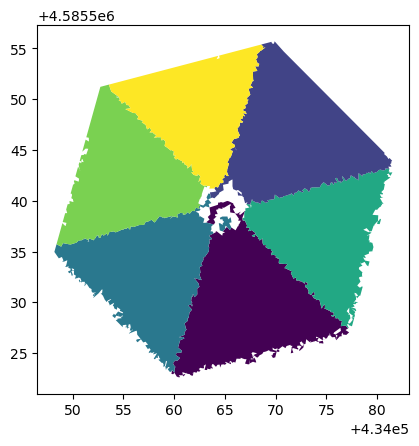

In [143]:
# Construction level
parcel = "4157903DF3845E"
construction = 86

parcelSubfolder = parcelsFolder + parcel + "/"
constructionFolder = parcelSubfolder + str(construction)
constructionFile = constructionFolder + "/Plane Identification/"+ str(construction)+".gpkg"
planesGDF = gpd.read_file(constructionFile)
planesGDF.plot(column="cluster")

In [162]:
# Plane level
cluster = 20
lasFile = constructionFolder + "/Plane Identification/"+ str(construction)+".laz"
lasDF = laspy.read(lasFile)

# def sample_points(lasDF, planesGDF, cluster):
selectedPoints = lasDF[lasDF.classification == cluster]
points = selectedPoints.xyz
shapely_points = [Point(p[:2]) for p in points]
geometry = planesGDF[planesGDF.cluster == cluster].geometry.values
inside_points = [point for point, shapely_point in zip(points, shapely_points) if geometry.contains(shapely_point)]

In [197]:
# point level
def get_shading_profile(point):
    Z_point = point[2]+0.05
    tiltangle = np.zeros(X.shape)
    distance = (X[:,:] - point[0])**2 + (Y[:,:] - point[1])**2
    tiltangle = np.arctan2((z[:,:] - Z_point), distance[:,:])*180/math.pi
    tiltangle = np.maximum(tiltangle, 0)
    azimuthAngle = np.zeros(X.shape)
    azimuthAngle = np.arctan2(X[:,:] - point[0], Y[:,:] - point[1])*180/math.pi
    azimuthAngle = np.where(azimuthAngle < 0, azimuthAngle + 360, azimuthAngle)
    azimuthAngle = np.round(azimuthAngle).astype(int)

    azimuthAngle_flat = azimuthAngle.ravel()
    tiltangle_flat = tiltangle.ravel()
    df = pd.DataFrame({
        'azimuth': azimuthAngle_flat,
        'tiltangle': tiltangle_flat
    })

    # Group by azimuth and get the maximum tiltangle for each azimuth
    max_tilt_df = df.groupby('azimuth')['tiltangle'].max().reset_index()

    return max_tilt_df.tiltangle.values

shading_results = []
for idx, point in enumerate(inside_points):
    print(idx)
    shading_results.append(get_shading_profile(point))

shading_results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


KeyboardInterrupt: 

/tmp/ipykernel_17918/1931860671.py:3: RuntimeWarning: divide by zero encountered in log
  c = ax.pcolormesh(X, Y, np.log(tiltangle), cmap='gray_r', shading='auto')


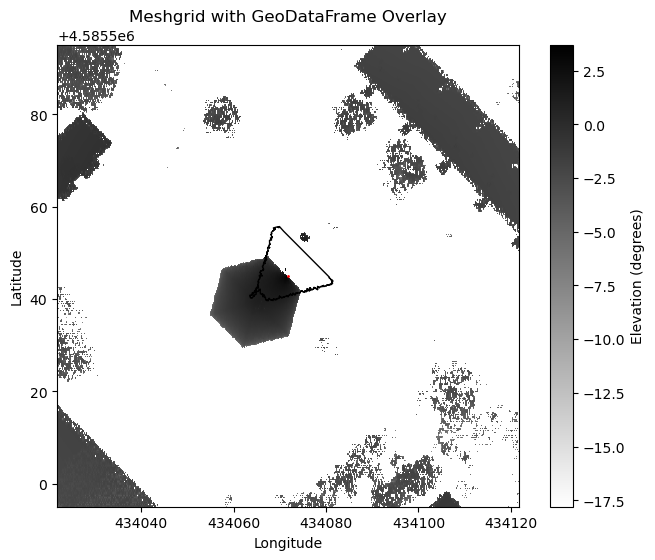

In [193]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, np.log(tiltangle), cmap='gray_r', shading='auto')
fig.colorbar(c, ax=ax, label="Elevation (degrees)")


# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==cluster].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Meshgrid with GeoDataFrame Overlay')

ax.set_xlim(point[0]-50, point[0]+50)
ax.set_ylim(point[1]-50, point[1]+50)

ax.scatter(point[0], point[1], s=1, c="red")

# Show the plot
plt.show()